## Who are our users? 
A closer look at who we are....

In [1]:
import pandas as pd
import numpy as np
import tweepy
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

In [17]:
from wordcloud import WordCloud

In [2]:
path = "/home/adrian/test/Kahoot-challenge/data/part_3/users.csv"
df_users = pd.read_csv(path,index_col=["user_id"])

In [43]:
print(f"Kahoot was played in: {df_users.country.unique().shape[0]} Countries!")

Kahoot was played in: 100 Countries!


Kahoot truly is a global company, being played in more than 100 countries worldwide within a single week! Players span the United States, all through Europe, India, Asia and even Greenland! 

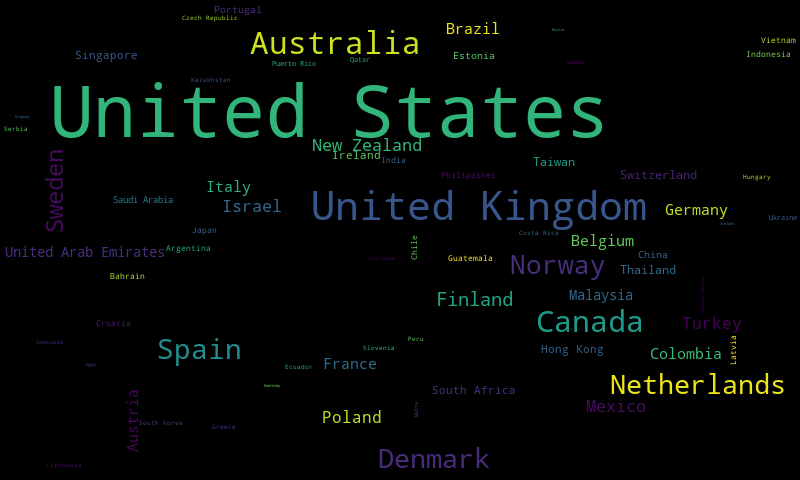

In [57]:
wc = WordCloud(background_color='black', width=800, height=480)
wc.fit_words(df_users.country.value_counts().to_dict())
wc.to_image()

Even though our users are from all around the world, there are some countries where Kahoot really shines bright...

10 Most active countries: country
Finland            117
Sweden             189
Norway             224
Denmark            243
Netherlands        252
Spain              269
Canada             321
Australia          335
United Kingdom     612
United States     6017
dtype: int64

10 least active countries: country
Panama            1
Guyana            1
Nicaragua         1
Morocco           1
Pakistan          1
Cayman Islands    1
Iraq              1
Bulgaria          1
Curaçao           1
Isle of Man       1
dtype: int64


[]

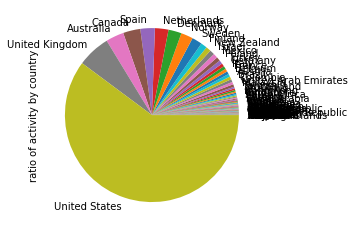

In [58]:
country_activity = df_users.groupby("country").size().sort_values()
print(f"10 Most active countries: {country_activity[-10:]}\n\n10 least active countries: {country_activity[:10]}")
fig = country_activity.plot.pie(label="ratio of activity by country")
fig.plot()

US is by far our biggest player, with more than half our traffic within a given week. Other well developed western countries who speaks english, like the UK, Australia and Canada and all the nordic countries are also among our top Kahooters.

Among these, we categorize into 4 different types of users:


In [52]:
# @hidden_cell
print("types of users: \n")
for user_type in df_users.primary_usage.unique():
    if(type(user_type)!= str):
        continue
    print(user_type)

types of users: 

teacher
social
student
business


#### We have teachers, social players, students and business users

Teachers highly dominate among our users, covering more than half the engagement within a week, with students coming in at a strong second. 

In other words, Kahoot really thrives in an educational setting. 

Ratio of games initiated / played by our types of users.


[]

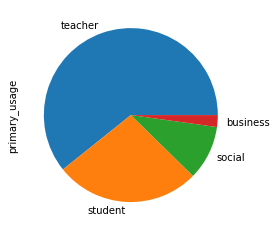

In [54]:
print("Ratio of games initiated / played by our types of users.")
df_users.primary_usage.value_counts().plot.pie().plot()

Among our users, most of them are there to attend / play, not to create. With a median of 2 kahoots created for a random user.  

There are some users that really loves making kahoots, reaching up to values as high as 300+ kahoots created. The top creators are teachers, with a way higher engagement regarding creation of Kahoots.

In [70]:
print("Overview of stats from all kahoots created")
df_users.my_kahoots_count.describe()

Overview of stats from all kahoots created


count    8992.000000
mean        8.371552
std        16.650655
min         0.000000
25%         1.000000
50%         2.000000
75%         9.000000
max       326.000000
Name: my_kahoots_count, dtype: float64

In [71]:
print("Overview of stats from kahoots created by teachers")
df_users[df_users["primary_usage"]=="teacher"].my_kahoots_count.describe()

Overview of stats from kahoots created by teachers


count    5461.000000
mean       12.578649
std        20.131852
min         0.000000
25%         1.000000
50%         6.000000
75%        16.000000
max       326.000000
Name: my_kahoots_count, dtype: float64


Teachers stand for over 90% of all kahoots created... Indicating that there truly is a Kahoot for the creator, and a Kahoot for the attenders...

In [69]:
print("Percentage of how many Kahoots were created by teachers:")
df_users[df_users["primary_usage"]=="teacher"].my_kahoots_count.sum()/df_users.my_kahoots_count.sum()

Percentage of how many Kahoots were created by teachers:


0.9125230814192914

Evaluating this shows that Kahoot has to think about how the product is used, as we definetely have 1 type of users that can be considered a power user, using Kahoot in a specific way.

Meanwhile, the result of what these power users create are consumed by another type of user, and it is crucial that we need to keep this consumption interesting in order to keep our power users...

### An impressive 97% of games joined by all users were created by teachers.... Strengthening that Kahoot is an educational platform more so than entertainment.   

In [59]:
print("Percentage of how many games that were joined, were created by teachers")
df_users[df_users["primary_usage"]=="teacher"].my_kahoots_players_joined_count.sum() / df_users.my_kahoots_players_joined_count.sum() 

Percentage of how many games that were joined, were created by teachers


0.9749614707838771

## Where do our users enter kahoot from? 

### Most of our users enters Kahoot through google and other search engines. But a lot of our traffic also comes straight from our website, kahoot.it, suggesting that the user is somewhat familiar with the product when entering... Maybe the game is broadcasted on a huge screen in the classrom, or a TV at a party....

In [11]:
print("domain: \tcount:")
df_users.initial_referring_domain.value_counts()[:20]

domain: 	count:


www.google.com          2374
kahoot.it               1962
getkahoot.com            948
create.kahoot.it         487
www.google.co.uk         291
www.bing.com             265
kahoot.com               244
classroom.google.com     224
www.google.ca            143
www.google.com.au        131
www.google.es            122
www.google.dk            107
www.google.nl            105
www.google.se             90
www.google.no             74
search.yahoo.com          48
www.google.fi             48
www.google.co.il          44
www.google.co.nz          40
www.google.com.tr         38
Name: initial_referring_domain, dtype: int64

In [12]:
df_users

,city,country,device,device_type,dma,language,browser,region,created,initial_referring_domain,...,kahoots_favourited_by_me_count,kahoots_shared_with_me_count,my_kahoots_answers_received_count,my_kahoots_count,my_kahoots_favourited_by_anyone_count,my_kahoots_played_by_anyone_count,my_kahoots_players_joined_count,my_kahoots_questions_count,my_kahoots_shared_by_anyone_count,primary_usage
user_id,,,,,,,,,,,,,,,,,,,,,
1,Logroño,Spain,Windows,Windows,NaN,Spanish,Firefox 53,La Rioja,2016-02-08T08:46:15.546Z,create.kahoot.it,...,1.0,0.0,17875.0,16.0,8.0,69.0,575.0,583.0,0.0,teacher
2,Elmhurst,United States,Mac,Mac,"Chicago, IL",English,Safari 9,Illinois,2015-11-06T17:48:19.465Z,www.google.com,...,0.0,0.0,1191.0,4.0,0.0,17.0,149.0,34.0,0.0,teacher
3,Roseville,United States,Chromium OS,NaN,"Sacramento-Stockton-Modesto, CA",English,Chrome 58,California,2017-05-10T15:31:48.202Z,create.kahoot.it,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,teacher
4,Mmabatho,South Africa,Windows,Windows,NaN,English,Chrome 55,Province of North West,2017-05-08T17:44:10.664Z,kahoot.it,...,0.0,0.0,7.0,1.0,0.0,3.0,4.0,2.0,0.0,teacher
5,Fischer,United States,Mac,Mac,"San Antonio, TX",English,Chrome 58,Texas,2015-03-09T16:29:12.628Z,kahoot.it,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,teacher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Dublin,Ireland,Windows,Windows,NaN,English,Chrome 58,Leinster,2015-04-23T09:44:35.112Z,www.google.ie,...,23.0,0.0,18502.0,3.0,42.0,168.0,1860.0,35.0,1.0,teacher
9997,Philadelphia,United States,Windows,Windows,"Philadelphia, PA",English,IE 11,Pennsylvania,2015-10-27T17:53:40.691Z,www.bing.com,...,25.0,0.0,8265.0,11.0,9.0,53.0,529.0,210.0,0.0,teacher
9998,Olathe,United States,Windows,Windows,"Kansas City, MO",English,IE 11,Kansas,2016-03-09T18:04:39.731Z,kahoot.it,...,0.0,0.0,616.0,15.0,0.0,5.0,63.0,337.0,0.0,teacher


In [13]:
def convert_date(row):
    try:
        return "-".join(row.split("-")[:2])
    except:
        return ""

In [14]:
df_users.created = df_users.created.apply(convert_date)

In [15]:
df_users.groupby("created").size()

created
           1032
2013-09       1
2013-10       1
2013-11       4
2013-12       5
2014-01       7
2014-02      15
2014-03      32
2014-04      44
2014-05      36
2014-06      22
2014-07      21
2014-08      46
2014-09      67
2014-10      90
2014-11     119
2014-12      84
2015-01      95
2015-02     118
2015-03     164
2015-04     130
2015-05     117
2015-06      58
2015-07      57
2015-08     126
2015-09     180
2015-10     190
2015-11     180
2015-12     164
2016-01     171
2016-02     186
2016-03     194
2016-04     173
2016-05     176
2016-06      97
2016-07      46
2016-08     183
2016-09     335
2016-10     275
2016-11     305
2016-12     257
2017-01     246
2017-02     296
2017-03     423
2017-04     627
2017-05    2802
2017-06       3
dtype: int64